# DS-SF-36 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Project 1 and 2.  You will summarize and present your findings and the methods you used.

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

C:\Users\jmiller16\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,397.0,0.317380,0.466044,0.00,0.00,0.0,1.00,1.0
gre,397.0,587.858942,115.717787,220.00,520.00,580.0,660.00,800.0
gpa,397.0,3.392242,0.380208,2.26,3.13,3.4,3.67,4.0
prestige,397.0,2.488665,0.947083,1.00,2.00,2.0,3.00,4.0


In [4]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [5]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [6]:
pd.crosstab(df.prestige, df.admit,dropna=False)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## as prestige increases from 1 t o 4, the % admission decreases.

In [7]:
# TODO
pd.crosstab(df.prestige, df.admit,dropna=False, normalize='index')

admit,0,1
prestige,,
1.0,0.459016,0.540984
2.0,0.641892,0.358108
3.0,0.768595,0.231405
4.0,0.820896,0.179104


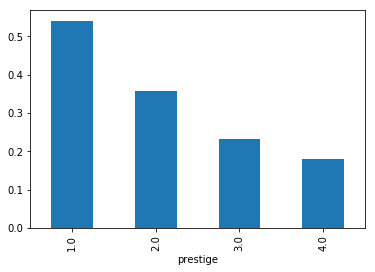

In [8]:
df.groupby(df.prestige).admit.mean().plot.bar()

In [9]:
df['prestige'] = df['prestige'].apply(np.int64)
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.93,4


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [10]:
# TODO
prestige_df = pd.get_dummies(df.prestige, prefix = 'Prestige')
prestige_df.head()

,Prestige_1,Prestige_2,Prestige_3,Prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


> ### Question 3.  How many of these binary variables do we need for modeling?

Answer: we need k-1 = 3 for the modelings.

> ### Question 4.  Why are we doing this?

Answer: we are converting categorical variables to numerical variables to be able to fit the equation.  We are also dropping 1 of the dummy coding to eliminate multicolinearity.

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [11]:
# TODO
df = pd.merge(df, prestige_df,left_index=True, right_index=True)
df.drop('prestige', axis=1, inplace=True)
df.columns

Index([u'admit', u'gre', u'gpa', u'Prestige_1', u'Prestige_2', u'Prestige_3',
       u'Prestige_4'],
      dtype='object')

## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [12]:
# TODO
df[['Prestige_1']].groupby(df.admit).sum()

,Prestige_1
admit,
0,28
1,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [13]:
# TODO
print('odds of being admitted to graduate school for applicants that attended the most prestigious \
undergraduate schools is {:f}'.format(33/28.))

odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools is 1.178571


> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [14]:
# TODO
df[['Prestige_2','Prestige_3','Prestige_4']].groupby(df.admit).sum()

,Prestige_2,Prestige_3,Prestige_4
admit,,,
0,95,93,55
1,53,28,12


In [15]:
(53+28+12)/(95+93+55.)

0.38271604938271603

> ### Question 9.  Finally, what's the odds ratio?

In [16]:
# TODO
(33/28.)/((53+28+12)/(95+93+55.))

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

Answer: Students graduating from prestige ranking = 1 undergraduate schools are 3 times more likely to be admitted to UCLA compared to students who did not graduate from a prestige ranking =1 undergraduate school.

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [17]:
# TODO
print('odds of being admitted to graduate school for applicants that attended the least prestigious \
undergraduate schools is {:f}'.format(12/55.))

odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools is 0.218182


In [18]:
df[['Prestige_1','Prestige_2','Prestige_3']].groupby(df.admit).sum()

,Prestige_1,Prestige_2,Prestige_3
admit,,,
0,28,95,93
1,33,53,28


In [19]:
(33+53+28)/(28+95+93.)

0.5277777777777778

In [20]:
(12/55.)/((33+53+28)/(28+95+93.))

0.4133971291866028

Answer: Students who attended the least prestige school have a 59% lower chance than the other students who graduated from higher prestige school to be admitted to UCLA graduate program.

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [21]:
# TODO
df['intercept']=1
X = df[ ['intercept','gre','gpa','Prestige_1','Prestige_2','Prestige_3'] ]
y = df.admit


In [22]:

from statsmodels.formula.api import logit
model_statsmodels = sm.Logit(y,X).fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


> ### Question 13.  Print the model's summary results.

In [23]:
# TODO
model_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Aug 2017   Pseudo R-squ.:                 0.08166
Time:                        17:37:29   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.4303      1.140     -4.764      0.000      -7.664      -3.196
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
Prestige_1     1.5534      0.417      3.721      0.000       0.735       2.372
Prestige_2     0.8733      0.367      2.378      0.017       0.153       1.593
Prestige_3     0.2147      0.393      0.547      0.584      -0.555       0.984
==============================================================================
"""

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [24]:
model_statsmodels.params

intercept    -5.430265
gre           0.002218
gpa           0.779337
Prestige_1    1.553411
Prestige_2    0.873274
Prestige_3    0.214733
dtype: float64

In [25]:
# TODO
np.exp(model_statsmodels.params)

intercept     0.004382
gre           1.002221
gpa           2.180027
Prestige_1    4.727566
Prestige_2    2.394738
Prestige_3    1.239531
dtype: float64

> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

Answer: The odds of admission increases by 2.39 when a student goes to a prestige = 2 ranked school.

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: for every unit increase in GPA, the odds of getting admitted to UCLA increases by 2.18.

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [26]:
# TODO
                       
predict_X = pd.DataFrame({'gre': [800, 800, 800, 800], 
                          'gpa': [4,4,4, 4],  
                          'Prestige_1':[1,0,0,0], 
                          'Prestige_2':[0,1,0,0], 
                          'Prestige_3':[0,0,1,0],
                          'intercept': [1,1,1,1]},
                         columns = ['intercept','gre','gpa','Prestige_1','Prestige_2','Prestige_3'])
predict_X = sm.add_constant(predict_X)
predict_X


,intercept,gre,gpa,Prestige_1,Prestige_2,Prestige_3
0,1,800,4,1,0,0
1,1,800,4,0,1,0
2,1,800,4,0,0,1
3,1,800,4,0,0,0


In [27]:
predict_y = model_statsmodels.predict(predict_X)
predict_y

0    0.734040
1    0.582995
2    0.419833
3    0.368608
dtype: float64

Answer: Student who went to prestige = 1 has 73% probablity.  Student who went to prestige = 2 has 58% probability.  Student who went to prestige =3 has 42% probablity.  Student who went to prestige = 4 has 37% probability.

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [28]:
# TODO
model_sk = linear_model.LogisticRegression().fit(X,y)

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [29]:
# TODO
coef = pd.DataFrame(zip(X.columns, np.transpose(model_sk.coef_[0])), columns=["coef", "value"])
coef

,coef,value
0,intercept,-1.584582
1,gre,0.001826
2,gpa,0.265531
3,Prestige_1,1.225281
4,Prestige_2,0.568980
5,Prestige_3,0.011217


In [30]:
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef

,coef,value,odds_ratio
0,intercept,-1.584582,0.205033
1,gre,0.001826,1.001827
2,gpa,0.265531,1.304123
3,Prestige_1,1.225281,3.405123
4,Prestige_2,0.568980,1.766465
5,Prestige_3,0.011217,1.011280


Answer: The coefficients are different from statsmodels vs. sklearn.  Why?

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [31]:
# TODO
predict_y = model_sk.predict_proba(predict_X)[:,1]
predict_y

array([ 0.64077913,  0.48062141,  0.34630595,  0.34377109])

Answer: Because the parameters are different, the outcome is different.  Need to investigate.

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

Answer: Using a student's gpa, gre and the undergraduate school prestige ranking, we predict whether this student will be admitted to the UCLA graduate program.

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

Answer: Data is clean with no missing values & outliers.  GPA and GRE are approximately normally distributed.  They both skew to the right.  Prestige ranking in the original dataset was converted to dummy variable with 1-hot encoding.

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

In [32]:
df.groupby('admit')['gre','gpa'].mean()

,gre,gpa
admit,,
0,573.579336,3.347159
1,618.571429,3.489206


### Higher GRE and higher GPA are positively correlated to getting admitted

In [33]:
df.groupby('admit')['Prestige_1','Prestige_2','Prestige_3','Prestige_4'].sum()
# pd.crosstab(df.admit, (df['Prestige_1'],df['Prestige_2'],df['Prestige_3'],df['Prestige_4']),dropna=False,normalize='columns')
# pd.crosstab(df.admit, (df['Prestige_1']),dropna=False,normalize='columns')

,Prestige_1,Prestige_2,Prestige_3,Prestige_4
admit,,,,
0,28,95,93,55
1,33,53,28,12


### students enrolled in high prestige ranked schools are more likely to be admitted than students enrolled in lower prestige ranked schools.

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: Logistic regressions from both sklearn and statsmodels were used.  Surprisingly they returned different results so far.  GPA, gre, prestige 1-3 were used in both models.  Prestige_3 was not shown to be significant in the statsmodel output.

> ## Question 25.  Results
>
> Write up your results.

Answer: GRE, GPA, Prestige are all good predictors of whether a student will be admitted to the UCLA graduate program.  GRE and GPA are positively correlated to admission, while Prestige is negatively correlated to admission.  The higher the undergraduate prestige ranking, the more likely the student is admitted to UCLA.  

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

Answer: The model has a high False negative of 102.  This means that there are 102 students who were actually admitted, but the model predicted no.  This also resulted in a low True Postive count of 24.  This means that out of 126 admissions, we only predicted accurately 24 of them.  There are likely other major factors that goes into deciding of a student should be admitted to the program.

In [34]:
#null accuracy
df.admit.value_counts(normalize=True)

0    0.68262
1    0.31738
Name: admit, dtype: float64

In [35]:
#Pass the predictions and y_test into a confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
preds = model_sk.predict(X)
confusion_matrix(y, preds)

array([[257,  14],
       [102,  24]])

In [36]:
ps = float(precision_score(y, preds))
rs = float(recall_score(y, preds))

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 63.16 and the recall score is 19.05


> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: It's very odd that statsmodels and sklearn returned different solutions using the data, although the general trends are similar, ie students graduating from top ranked schools are more likely to be admitted than students graduating from the bottom ranked schools.  I will need to investigate this issue further.